In [45]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb 
# import seaborn as sns
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [6]:

# Historical plot for the adjusted close price
def adj_close_chart(ticker,startdate):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start=startdate)['Adj Close']
    data.plot(figsize=(10, 6))
    plt.show()

# Volatility - daily percentage change in log form
def log_returns(ticker,startdate):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start=startdate)['Adj Close']
    log_return = np.log(1 + data.pct_change())
    log_return.plot(figsize = (10, 6))
    plt.show()

# Monte Carlo Model - 
# intervals: number of days
# itterations: number of simulations
def simulate(ticker,startdate,intervals,itterations):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start=startdate)['Adj Close']
    t_interval = intervals
    iteration = itterations
    log_returns = np.log(1 + data.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    np.array(drift)
    x = np.random.rand(30, 2)
    Z = norm.ppf(np.random.rand(30,2))

    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_interval, iteration)))
    S0 = data.iloc[-1]
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    for t in range(1, t_interval):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    
    # plt.ylim((30,75))
    plt.figure(figsize=(12,6))
    plt.plot(price_list)
    plt.show() 

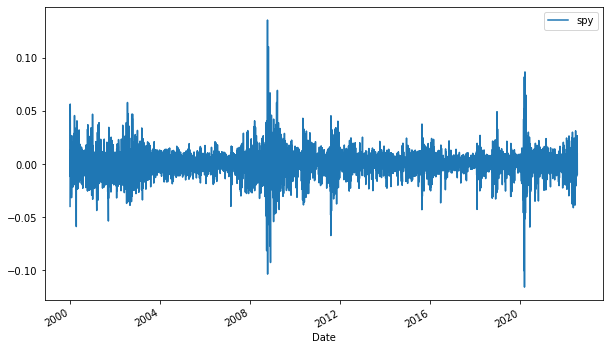

In [47]:
# simulate('spy','2000-1-1',60,200)
# adj_close_chart('spy','2000-1-1')
log_returns('spy','2000-1-1')


In [ ]:
# log_returns = np.log(1 + data.pct_change())
# log_returns.tail()